In [ ]:
# Records episode video.

import tensorflow as tf
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

from providers import env
from providers import actor
import shutil, os.path

from gym import wrappers

actor.restore()

video = './video'

total_reward = 0
for i in range(10):
    if os.path.exists(video):
        shutil.rmtree(video)
    eval_env = wrappers.Monitor(env, video)
    state, done, ep_ret, ep_len = eval_env.reset(), False, 0, 0
    total_reward = 0
    while not done:
        state, reward, done, _ = eval_env.step(actor(tf.constant([state]))[0])
        total_reward += reward
    eval_env.close()
    if total_reward > 250:
        break
    
print("## Done, total_reward: {}.".format(total_reward))

<IPython.core.display.Javascript object>


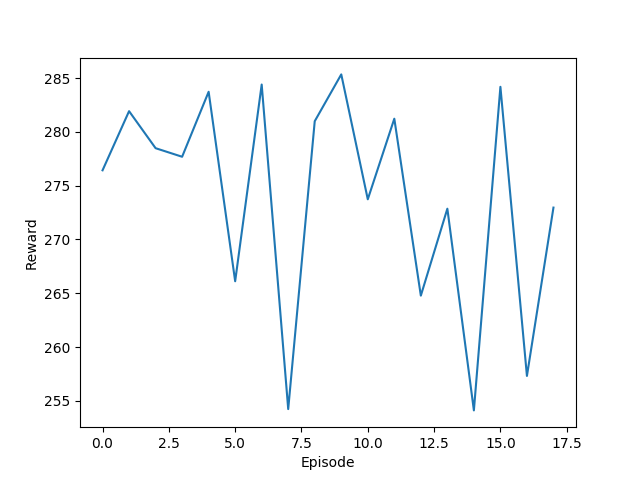

Avg [(252.9047895935911, 276.4292173210644, 306.68262158357334), (246.21685271256362, 281.9250899602817, 308.2201656482089), (255.035515097146, 278.48517827266727, 295.5388788037885), (251.55274387862806, 277.68838217285077, 302.38279557787223), (261.60338030977704, 283.7276911912114, 307.8572299038346), (208.52916978214418, 266.1189172431026, 297.8987142414311), (265.68409500380915, 284.39980590581297, 312.6952530926095), (49.91872751167517, 254.24093560199535, 301.3483968386637), (258.1843760952194, 280.99258477056674, 316.00801871881765), (259.9333999637198, 285.34171803971407, 311.9273490015579), (255.3148970085513, 273.7354869349393, 300.84249427479983), (260.83980083628444, 281.2246297847624, 303.4539913918593), (82.12248244236298, 264.78306705552086, 305.88843199013405), (254.01875489451209, 272.86227978260865, 306.01173663993484), (49.27212553906509, 254.11897531055834, 297.7674781895395), (260.410606858288, 284.18835857787013, 303.35700553913125), (47.943100728487906, 257.3225

In [7]:
import matplotlib.pyplot as plt
import pickle, os

file_name = 'results_1553447277.008411.txt'
results_path = os.path.join(os.getcwd(), 'results', file_name)

results = []
with open(results_path, "rb") as fp:
    while 1:
        try:
            results.append(pickle.load(fp))
        except EOFError:
            break

mins = [t[0] for t in results]
avg = [t[1] for t in results]
maxs = [t[2] for t in results]
    
%matplotlib notebook
plt.plot(avg)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()
